In [2]:
import h5py
import numpy as np
import skimage as sk
#print sk.__version__
from skimage import io
from matplotlib import pyplot as plt

In [3]:
from skimage import filters
from skimage import feature
from skimage import io
from scipy import ndimage as nd
from scipy import misc

In [4]:
from subprocess import check_output
print(check_output(["ls", "../dataset"]).decode("utf8"))

Cy3.tif
DAPI.tif
LowRes_13434_overlapping_pairs.h5
overlapping_chromosomes_examples.h5



In [5]:
h5f = h5py.File('../dataset/overlapping_chromosomes_examples.h5','r')
#h5f = h5py.File('../dataset/overlapping_subset_pairs.h5','r')
pairs = h5f['dataset_1'][:]
h5f.close()

In [9]:
print(pairs.shape)

(2853, 190, 189, 2)


In [6]:
pairs.shape
pairs[0,:,:,0].dtype
pairs[0,:,:,0].max()

95

In [7]:
subset = pairs[::2,:,:,:]
subset.shape

(1427, 190, 189, 2)

In [11]:
h5f = h5py.File('../dataset/overlapping_subset_pairs.h5', 'w')
h5f.create_dataset('dataset_1', data= subset)
h5f.close()

## Loading a subset of the overlapping examples

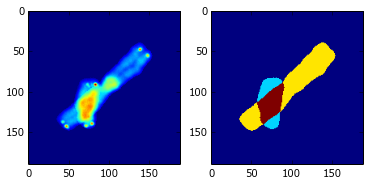

In [6]:
h5f = h5py.File('../dataset/overlapping_subset_pairs.h5','r')
subset = h5f['dataset_1'][:]
h5f.close()
grey = subset[10,:,:,0]
mask = subset[10,:,:,1]
%matplotlib inline
plt.subplot(121)
plt.imshow(grey)
plt.subplot(122)
plt.imshow(mask)

### Try to convert greyscale into uint8

In [ ]:
def toUint8(array4):
    a = array4/16
    a.astype(np.int8)

In [10]:
sub25 = np.copy(subset[0:24,:,:,:])
print sub25.shape, sub25.dtype

(24, 190, 189, 2) int64


In [14]:
greys = pairs[:,:,:,0]
masks = pairs[:,:,:,1]
g_ex1 = greys[200,:,:]
m_ex1 = masks[200,:,:]



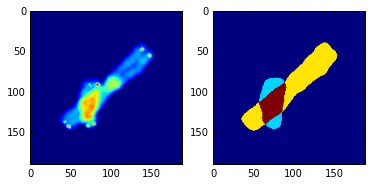

In [15]:
%matplotlib inline
plt.subplot(121)
plt.imshow(grey)
plt.subplot(122)
plt.imshow(mask)

In [17]:
np.apply_along_axis(
    func1d=lambda x: subset[:,:,:,0]/16,
    axis=1,
    arr=dat[:2,0])

ImportError: No module named mahotas

In [96]:
gabs = filters.gabor(g_ex1, 0.2)
images = []
factors = [2.0, 1.5, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
for i,k in enumerate(factors):
    images.append(misc.imresize(g_ex1, k))

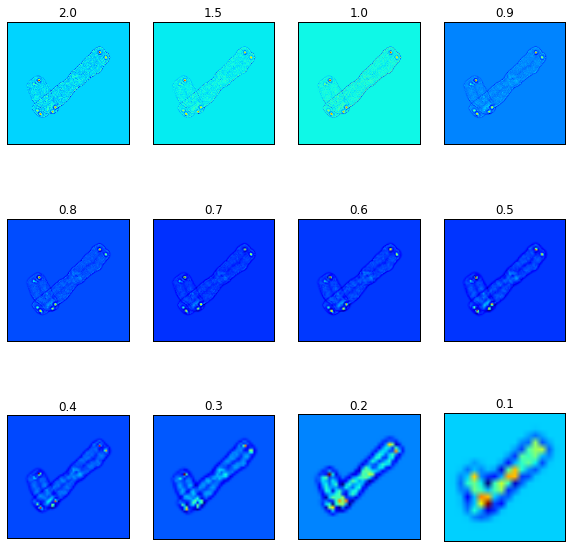

In [101]:
filters.gaussian(im, sigma=3)
from generator_tools import ResizeImages
plt.figure(figsize=(10,10))
for i,im in enumerate(images):
    plt.subplot(3,4,1+i, xticks=[],yticks=[])
    #plt.imshow(im, interpolation = 'nearest')
    plt.title(str(factors[i]))
    plt.imshow(filters.edges.laplace(im, ksize=3))
